In [1]:
conda install -c conda-forge scikit-surprise


Note: you may need to restart the kernel to use updated packages.




CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https//conda.anaconda.org/conda-forge/win-64'




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate

In [3]:
column_names=['userId','productId','rating','timestamp']
df=pd.read_csv(r"C:\Users\heert\Downloads\ratings_Electronics (1).csv\ratings_Electronics (1).csv",names=column_names)

In [4]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
df.shape

(7824482, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [7]:
df.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

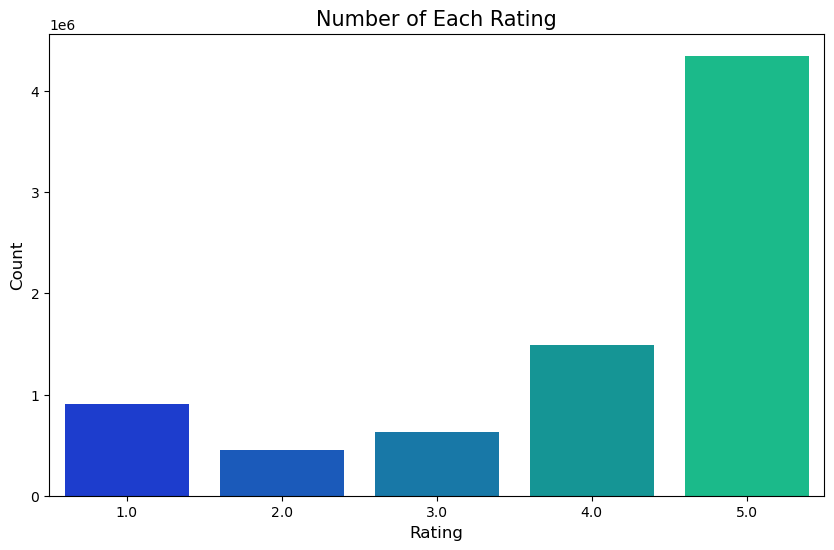

In [8]:
#Exploratory Data Analysis

plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=df, palette='winter')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Each Rating', fontsize=15)
plt.show()

In [9]:
df_rating=pd.DataFrame({'Number of Rating':df.groupby('productId').count()['rating'], 'Mean Rating':df.groupby('productId').mean()['rating']})

C:\Users\heert\AppData\Local\Temp\ipykernel_20016\1984073061.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rating=pd.DataFrame({'Number of Rating':df.groupby('productId').count()['rating'], 'Mean Rating':df.groupby('productId').mean()['rating']})


In [10]:
df_rating.head()

,Number of Rating,Mean Rating
productId,,
0132793040,1,5.000000
0321732944,1,5.000000
0439886341,3,1.666667
0511189877,6,4.500000
0528881469,27,2.851852


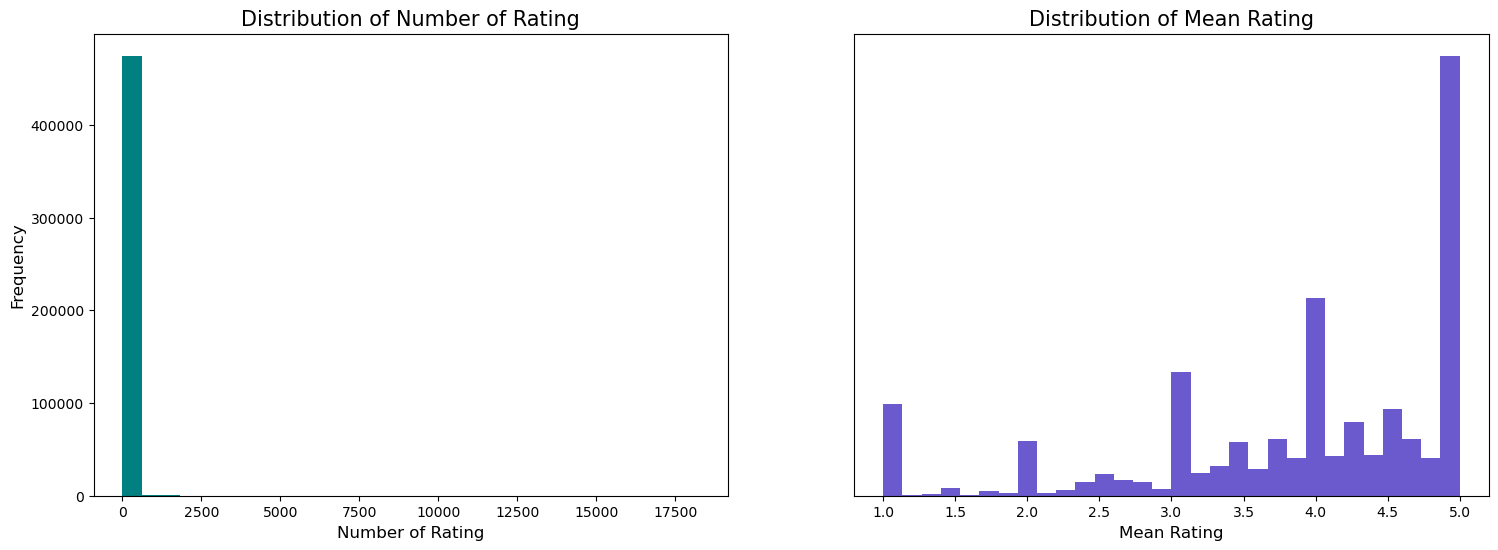

In [11]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(x='Number of Rating',data=df_rating,bins=30,color='teal')
plt.title('Distribution of Number of Rating', fontsize=15)
plt.xlabel('Number of Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1,2,2)
plt.hist(x='Mean Rating',data=df_rating,bins=30, color='slateblue')
plt.title('Distribution of Mean Rating', fontsize=15)
plt.xlabel('Mean Rating', fontsize=12)
plt.yticks([])
plt.show()

<Figure size 800x600 with 0 Axes>

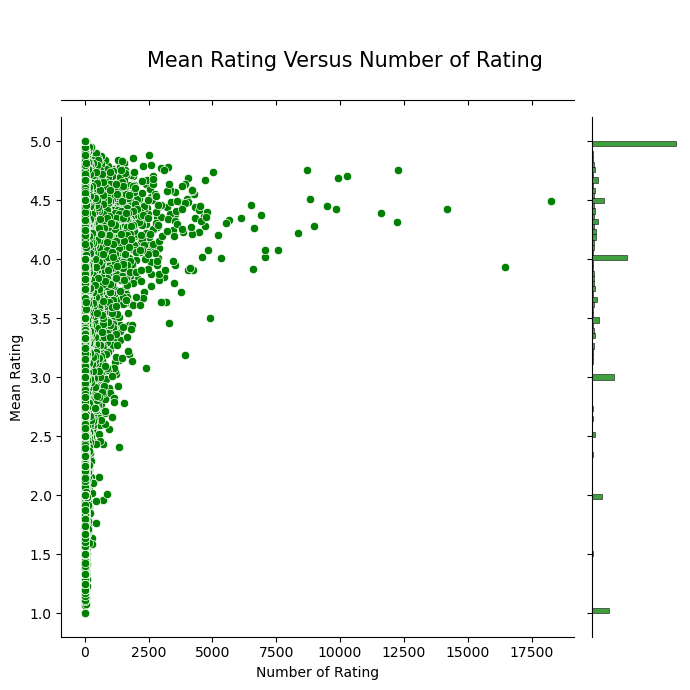

In [12]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Number of Rating', y='Mean Rating',data=df_rating,color='g', height=7)
plt.suptitle('Mean Rating Versus Number of Rating', fontsize=15, y=0.92)

plt.show()

In [13]:
df_rating['Mean Rating'].mean()

3.889700263013201

In [14]:
df_rating['Number of Rating'].quantile(q=0.9)

25.0

In [15]:
df_filtered=df_rating[df_rating['Number of Rating']>df_rating['Number of Rating'].quantile(q=0.9)]

In [16]:
df_filtered.shape


(46553, 2)

In [17]:
def product_score(x):
    v=x['Number of Rating']
    m=df_rating['Number of Rating'].quantile(q=0.9)
    R=x['Mean Rating']
    C=df_rating['Mean Rating'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

In [18]:
df_filtered['score']=df_filtered.apply(product_score, axis=1)

C:\Users\heert\AppData\Local\Temp\ipykernel_20016\682934750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['score']=df_filtered.apply(product_score, axis=1)


In [19]:



df_filtered.head()

,Number of Rating,Mean Rating,score
productId,,,
0528881469,27,2.851852,3.350817
0594481813,31,4.225806,4.075759
0972683275,1051,4.470980,4.457474
1400501466,250,3.560000,3.589973
1400501474,29,4.448276,4.189676


In [20]:
df_highscore=df_filtered.sort_values(by='score', ascending=False).head(10)


In [21]:
df_highscore

,Number of Rating,Mean Rating,score
productId,,,
B0043WJRRS,2512,4.881369,4.871597
B00CG70K78,237,4.949367,4.848254
B007SZ0E1K,449,4.895323,4.842284
B003FVVMS0,1876,4.853412,4.840738
B0033PRWSW,387,4.901809,4.840394
B008VGCT9K,230,4.939130,4.836245
B0029N3U8K,658,4.869301,4.833444
B0041OYTJE,458,4.879913,4.828659
B00GMRCAC6,187,4.951872,4.826616


In [22]:
df_highscore.index

Index(['B0043WJRRS', 'B00CG70K78', 'B007SZ0E1K', 'B003FVVMS0', 'B0033PRWSW',
       'B008VGCT9K', 'B0029N3U8K', 'B0041OYTJE', 'B00GMRCAC6', 'B007R5YGO2'],
      dtype='object', name='productId')

In [23]:
#Collaborative Recommende
svd = SVD()

In [24]:
reader = Reader()

In [25]:
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

In [26]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2953  1.2924  1.2959  1.2944  1.2943  1.2945  0.0012  
MAE (testset)     1.0199  1.0174  1.0201  1.0188  1.0189  1.0190  0.0010  
Fit time          435.83  1365.69 951.63  834.88  1189.01 955.41  318.56  
Test time         271.03  308.60  221.20  1167.93 560.05  505.76  351.10  


{'test_rmse': array([1.2953462 , 1.29243917, 1.29587699, 1.29443074, 1.29430226]),
 'test_mae': array([1.01994822, 1.01739014, 1.02012017, 1.01883445, 1.01893118]),
 'fit_time': (435.82902693748474,
  1365.6855144500732,
  951.625748872757,
  834.8772509098053,
  1189.013671875),
 'test_time': (271.0281767845154,
  308.60316348075867,
  221.19668292999268,
  1167.931518793106,
  560.0505173206329)}

In [27]:

trainset = data.build_full_trainset()

In [28]:
svd.fit(trainset)

In [29]:

df[df['userId'] == 'AKM1MP6P0OYPR']

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
5200191,AKM1MP6P0OYPR,B005UEB5TQ,5.0,1366243200


In [30]:
svd.predict(uid='A17HMM1M7T9PJ1', iid='0970407998', r_ui=None)

Prediction(uid='A17HMM1M7T9PJ1', iid='0970407998', r_ui=None, est=3.8820164244835382, details={'was_impossible': False})

In [31]:
svd.predict(uid='A17HMM1M7T9PJ1', iid='0970407998', r_ui=None).est

3.8820164244835382

In [32]:
#Hybrid Recommender
df_users=df.groupby('userId').filter(lambda x: x['rating'].count()>=50)

In [33]:
df_users.head()

,userId,productId,rating,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200


In [34]:
df_users.shape

(125871, 4)

In [35]:
matrix=pd.pivot_table(data=df_users, values='rating', index='userId',columns='productId')

In [36]:
matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100WO06OQR8BQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105S56ODHGJEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105TOJ6LTVMBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10AFVU66A79Y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Function that takes in productId and useId as input and outputs up to 5 most similar products.
def hybrid_recommendations(userId, productId):
    
    # Get the Id of the top five products that are correlated with the ProductId chosen by the user.
    top_five=matrix.corrwith(matrix[productId]).sort_values(ascending=False).head(5)
    
    # Predict the ratings the user might give to these top 5 most correlated products.
    est_rating=[]
    for x in list(top_five.index):
        if str(top_five[x])!='nan':
            est_rating.append(svd.predict(userId, iid=x, r_ui=None).est)
           
    return pd.DataFrame({'productId':list(top_five.index)[:len(est_rating)], 'estimated_rating':est_rating}).sort_values(by='estimated_rating', ascending=False).reset_index(drop=True)

In [38]:
hybrid_recommendations('A2NYK9KWFMJV4Y', 'B00LI4ZZO8')

C:\Users\heert\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\heert\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,productId,estimated_rating
0,B00KIMX4EY,4.991091
1,B00D1QC50S,4.828533
2,B005I7X3RC,4.732919
3,B00FRBCSUW,4.712750
4,B00ETH7ERM,4.579888
